## Introduction iris dataset (libro)



### Essential Libraries and Tools

#### NumPy

In [318]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [319]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [320]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [321]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

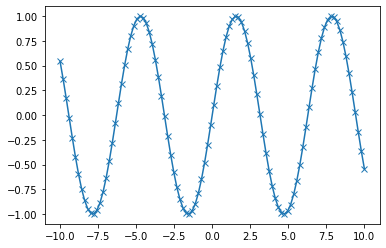

In [322]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

#### pandas

In [323]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [324]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### Importar las librerias

In [325]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn

Python version: 3.9.12 (tags/v3.9.12:b28265d, Mar 23 2022, 23:52:46) [MSC v.1929 64 bit (AMD64)]
pandas version: 2.1.1
matplotlib version: 3.7.1
NumPy version: 1.24.2
SciPy version: 1.10.1
IPython version: 7.27.0
scikit-learn version: 1.3.1


### Classifying Iris Species


In [326]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [327]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [328]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [329]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [330]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [331]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [332]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [333]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [334]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [335]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [336]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [338]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [339]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

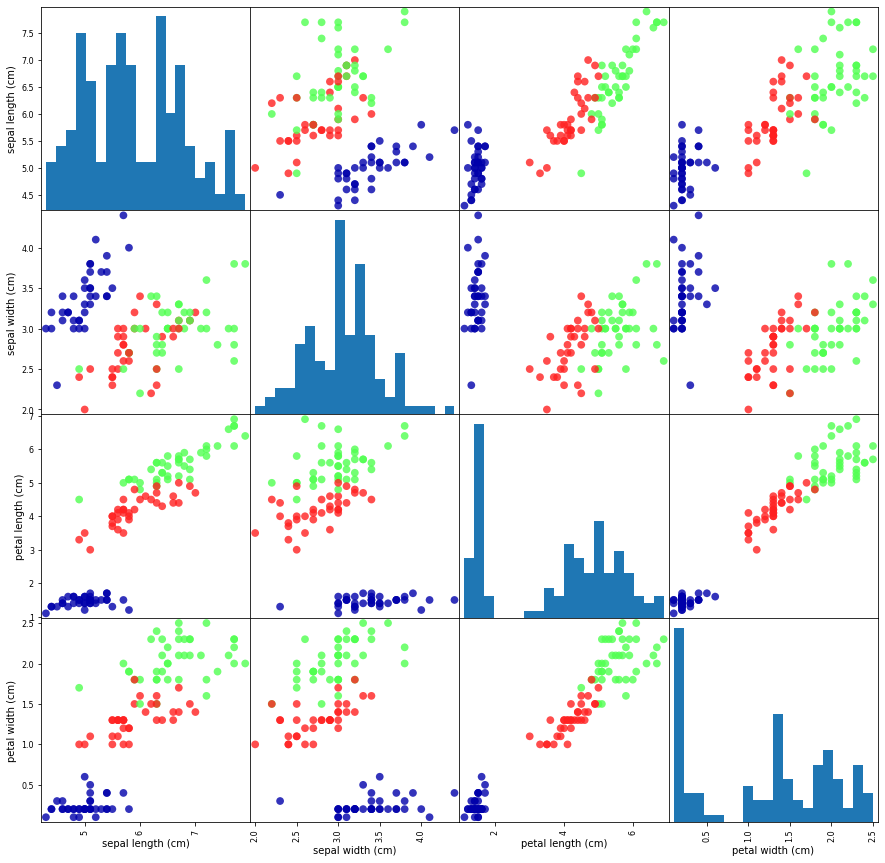

In [340]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

#### Building Your First Model: k-Nearest Neighbors

In [341]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [342]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Making Predictions

In [343]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [344]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

In [345]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [346]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [347]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Grafica

In [348]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Algoriths supervised machine


X.shape:(26, 2)


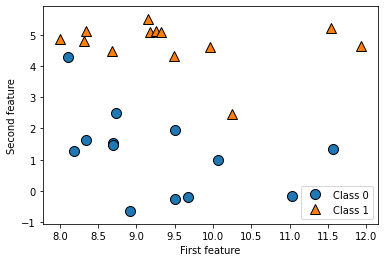

In [349]:
# generar el dataset
X , y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))

X.shape:(26, 2)


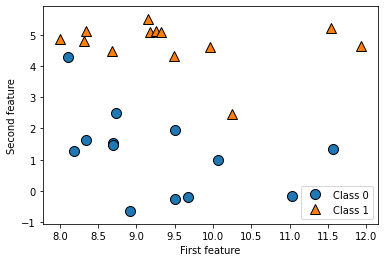

In [350]:
# generar el dataset
X , y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))

Text(0, 0.5, 'Target')

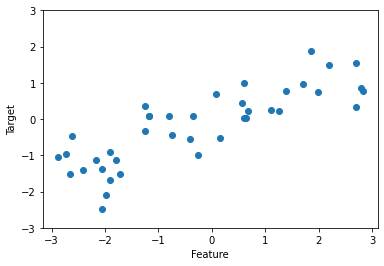

In [351]:
X , y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Dataset de cancer de pecho

In [352]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(); \n{}".format(cancer.keys()))

cancer.keys(); 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [353]:
print("Shape of cancer: {}".format(cancer.data.shape))

Shape of cancer: (569, 30)


In [354]:
print("sample count per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample count per class:
{'malignant': 212, 'benign': 357}


In [355]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Neighbors

In [356]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [357]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) 

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [358]:
# probar el test predictions
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [359]:
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.8571428571428571


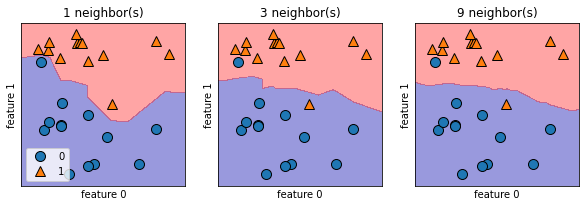

In [360]:
# declaracion de uso de las graficas
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

#bucle para graficar lo spuntos

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# Examen 

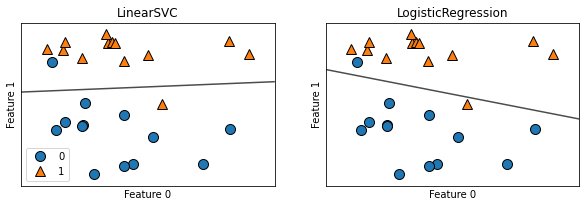

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(dual=False), LogisticRegression()], axes):
   clf = model.fit(X, y)
   mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)

   mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
   ax.set_title("{}".format(clf.__class__.__name__))
   ax.set_xlabel("Feature 0")
   ax.set_ylabel("Feature 1")
axes[0].legend()

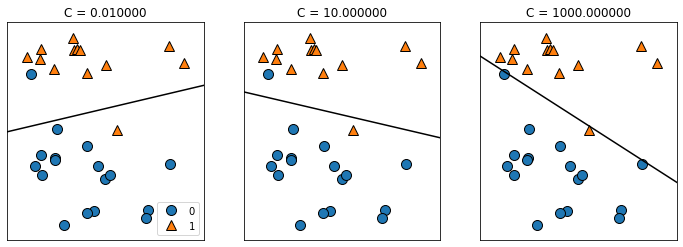

In [362]:
mglearn.plots.plot_linear_svc_regularization()

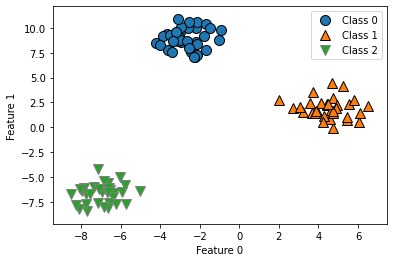

In [363]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[: ,0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1","Class 2"])

In [364]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


c:\Users\alexs\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
